In [1]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')

#print the first 5 rows of the dataframe
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
### Basic EDA and statistical analysis ###
## gives information about the data types,columns, null value counts, memory usage etc
## function reference : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
'''
DataFrame.describe() method generates descriptive statistics that summarize the central 
tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. 
This method tells us a lot of things about a dataset. One important thing is that the 
describe() method deals only with numeric values. It doesn't work with any categorical 
values. So if there are any categorical values in a column the describe() method will 
ignore it and display summary for the other columns unless parameter include="all" is passed.
'''
## basic statistic details about the data (note only numerical columns would be displayed here unless parameter include="all")
## for reference: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe
diabetes_data.describe(include='all')

diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
diabetes_data_copy=diabetes_data.copy(deep=True)
# When deep=True (default), a new object will be created with a copy of the calling object’s data and indices. 
# Modifications to the data or indices of the copy will not be reflected in the original object (see notes below).

In [6]:
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


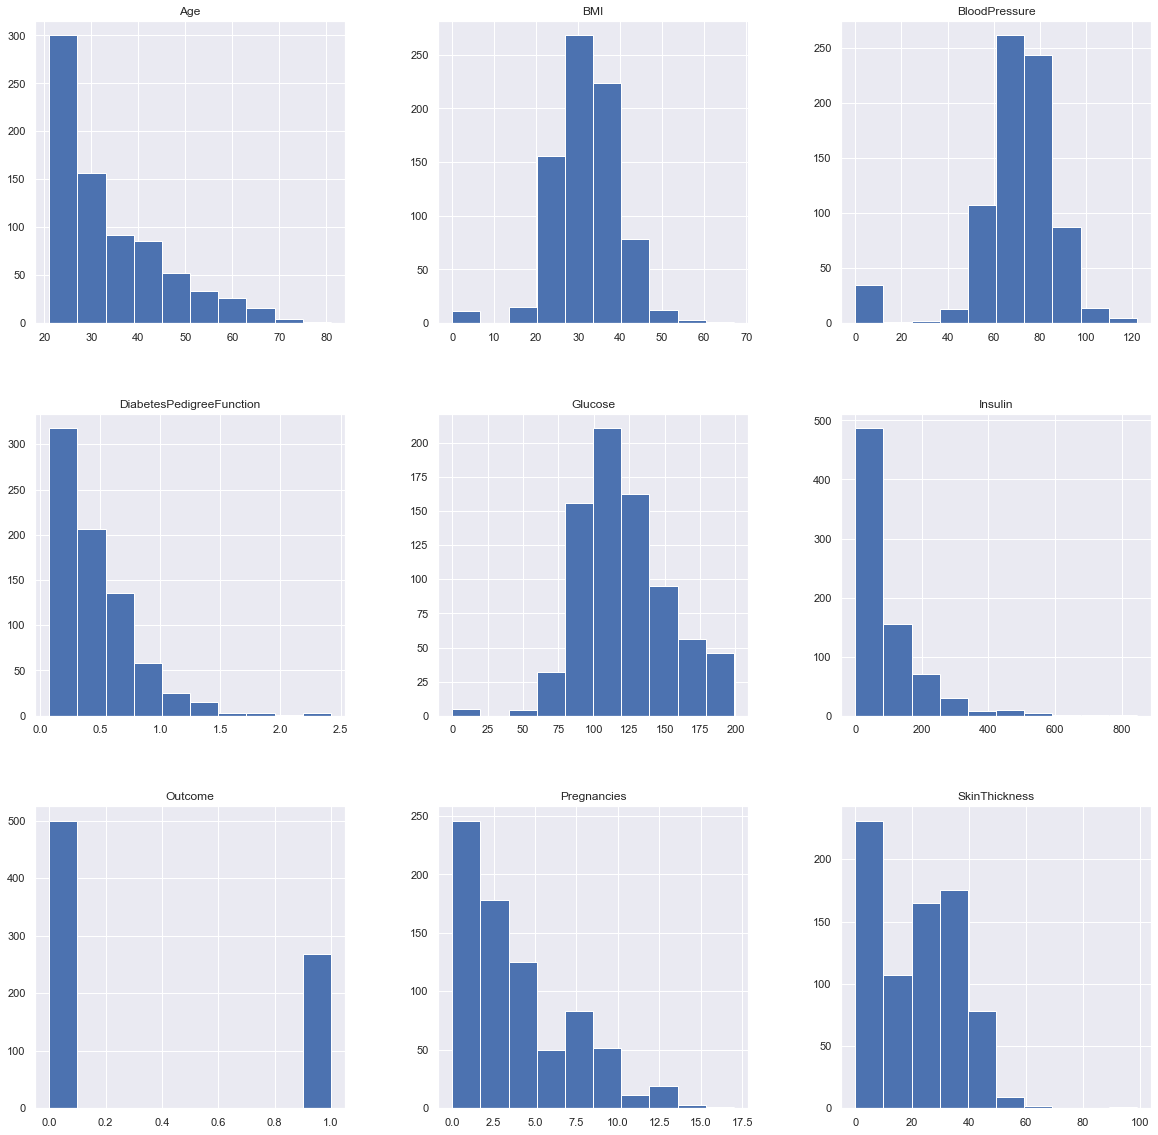

In [7]:
#To fill these Nan values the data distribution needs to be understood

p=diabetes_data.hist(figsize=(20,20))



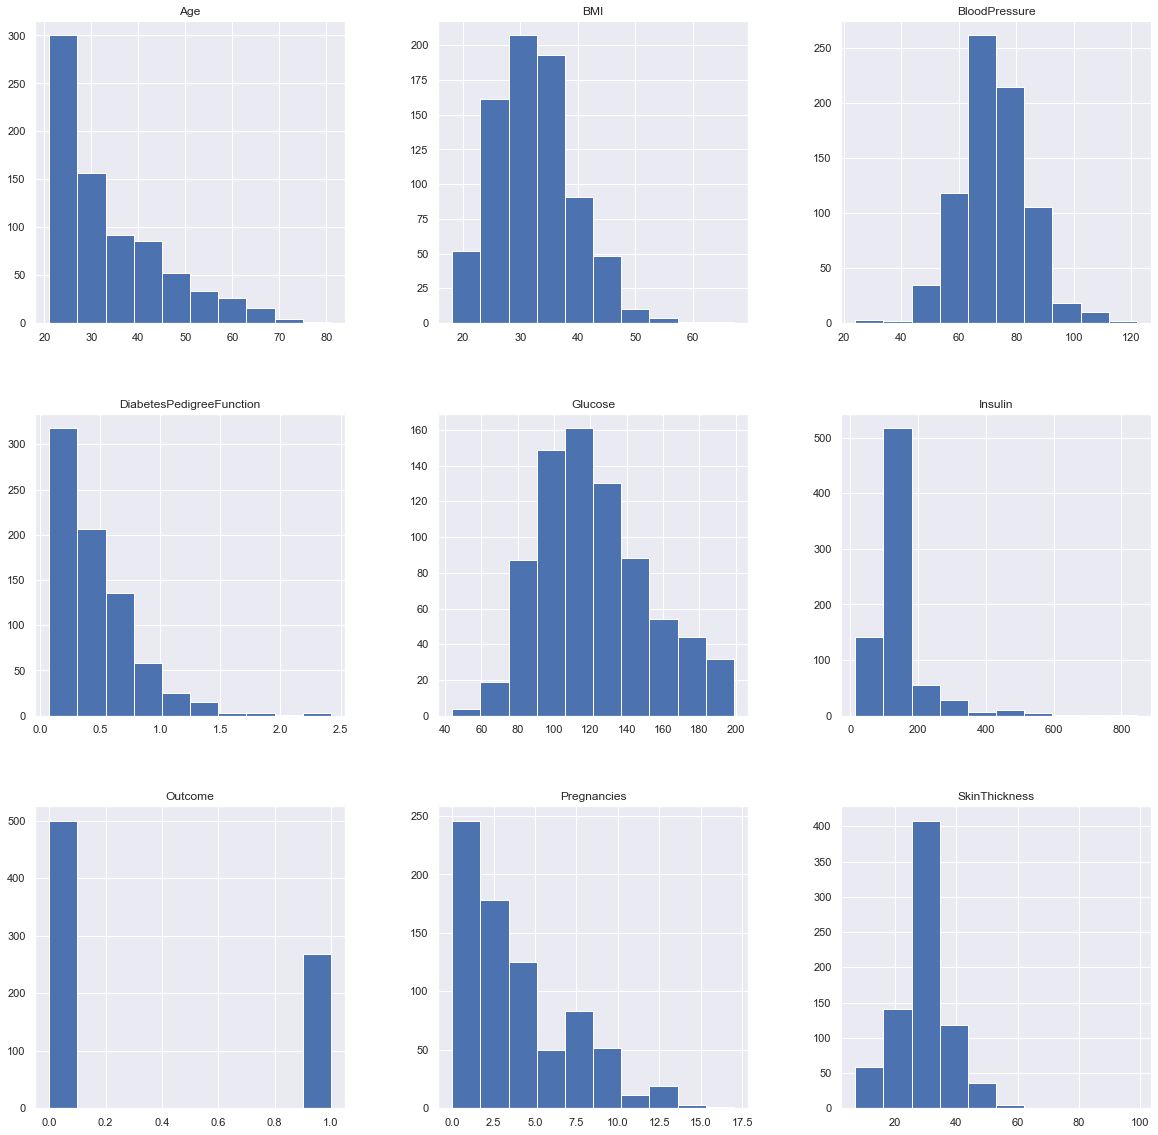

In [8]:
#Aiming to impute nan values for the columns in accordance with their distribution
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace=True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

# Plotting after Nan removal
p = diabetes_data_copy.hist(figsize = (20,20))

In [9]:
#Skewness
'''
A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.
'''

## observing the shape of the data
diabetes_data.shape

## data type analysis
# plt.figure(figsize=(5,5))
# sns.set(font_scale=2)
# sns.countplot(y=diabetes_data.dtypes ,data=diabetes_data)
# plt.xlabel("count of each data type")
# plt.ylabel("data types")
# plt.show()


(768, 9)

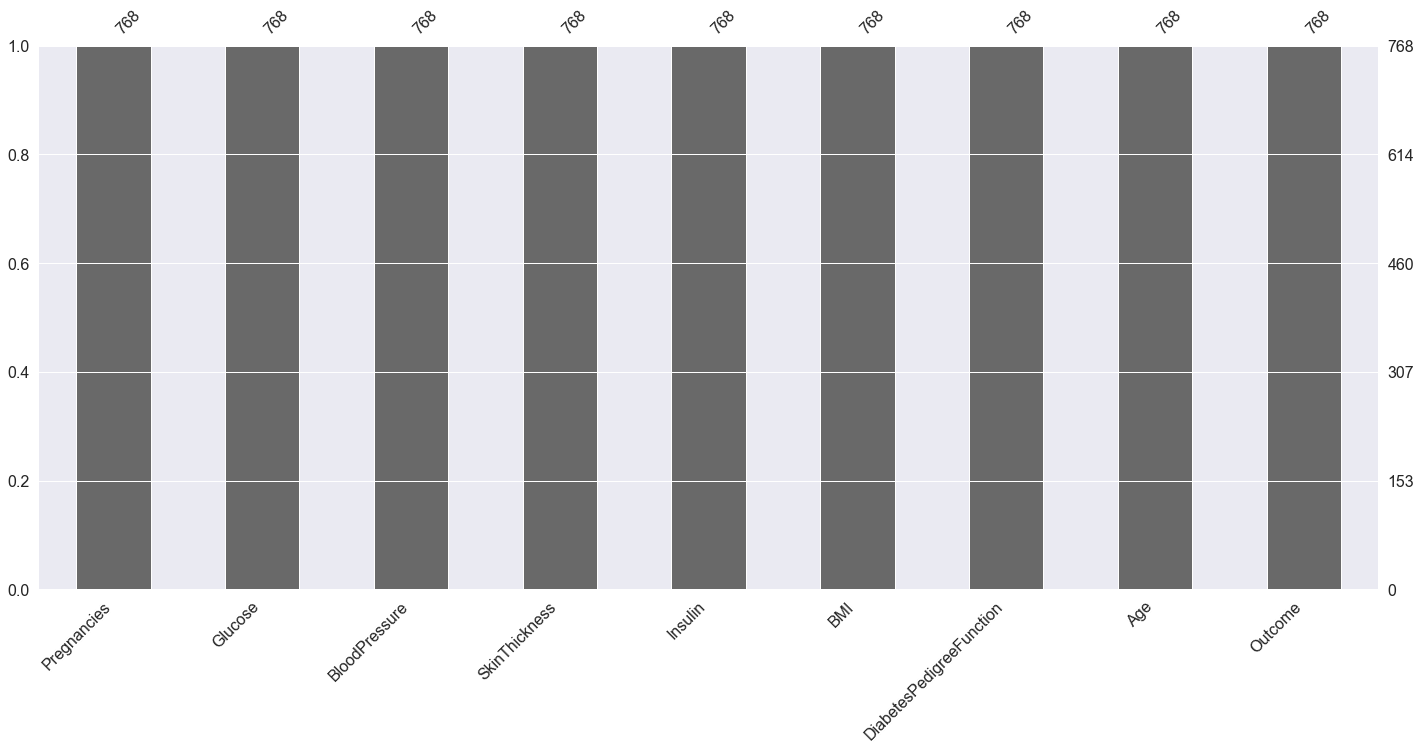

In [10]:
## null count analysis
import missingno as msno
p=msno.bar(diabetes_data)

0    500
1    268
Name: Outcome, dtype: int64


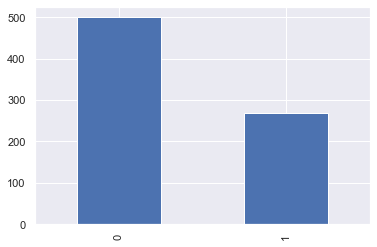

In [11]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1:"#0392cf", 2: "#7bc043"}
colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar")


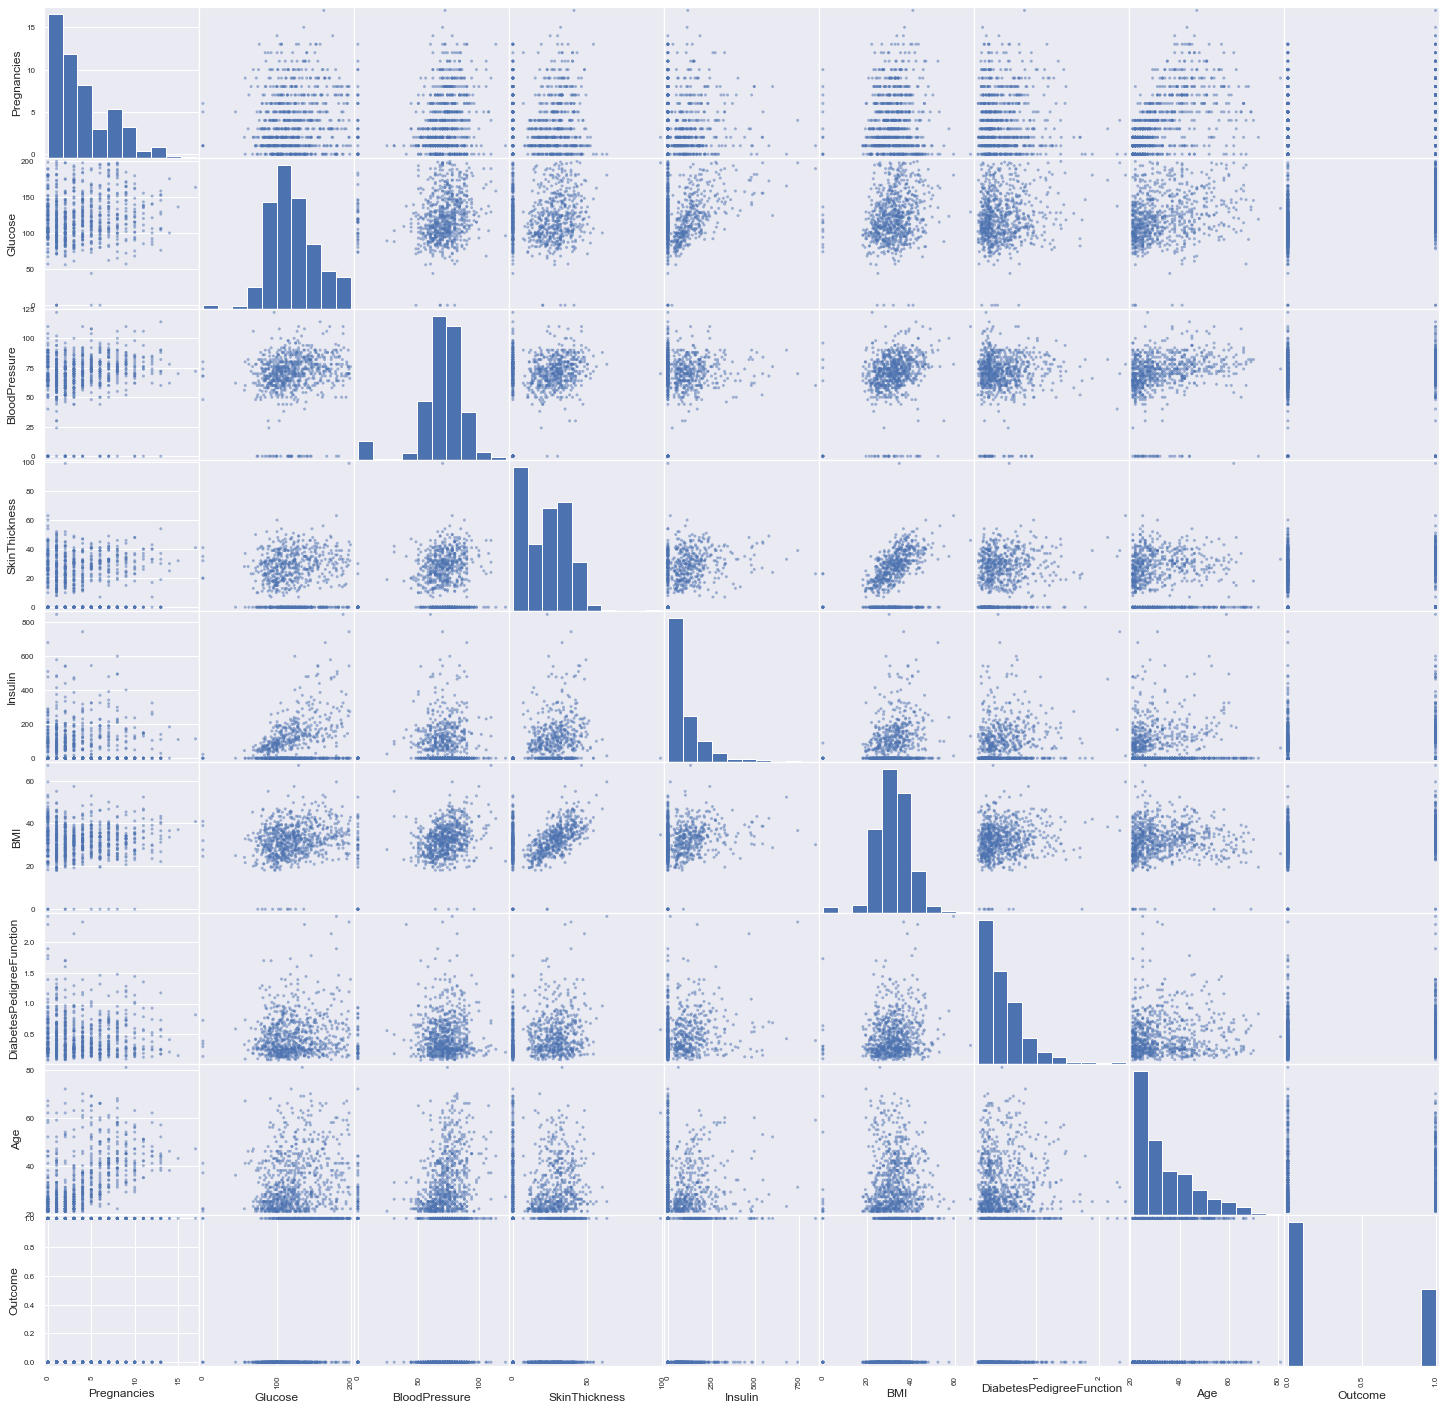

In [12]:
### Scatter matrix of uncleaned data
from pandas.plotting import scatter_matrix
p=scatter_matrix(diabetes_data, figsize=(25,25))

'''
The pairs plot builds on two basic figures, the histogram and the scatter plot. 
The histogram on the diagonal allows us to see the distribution of a single 
variable while the scatter plots on the upper and lower triangles show the 
relationship (or lack thereof) between two variables
'''

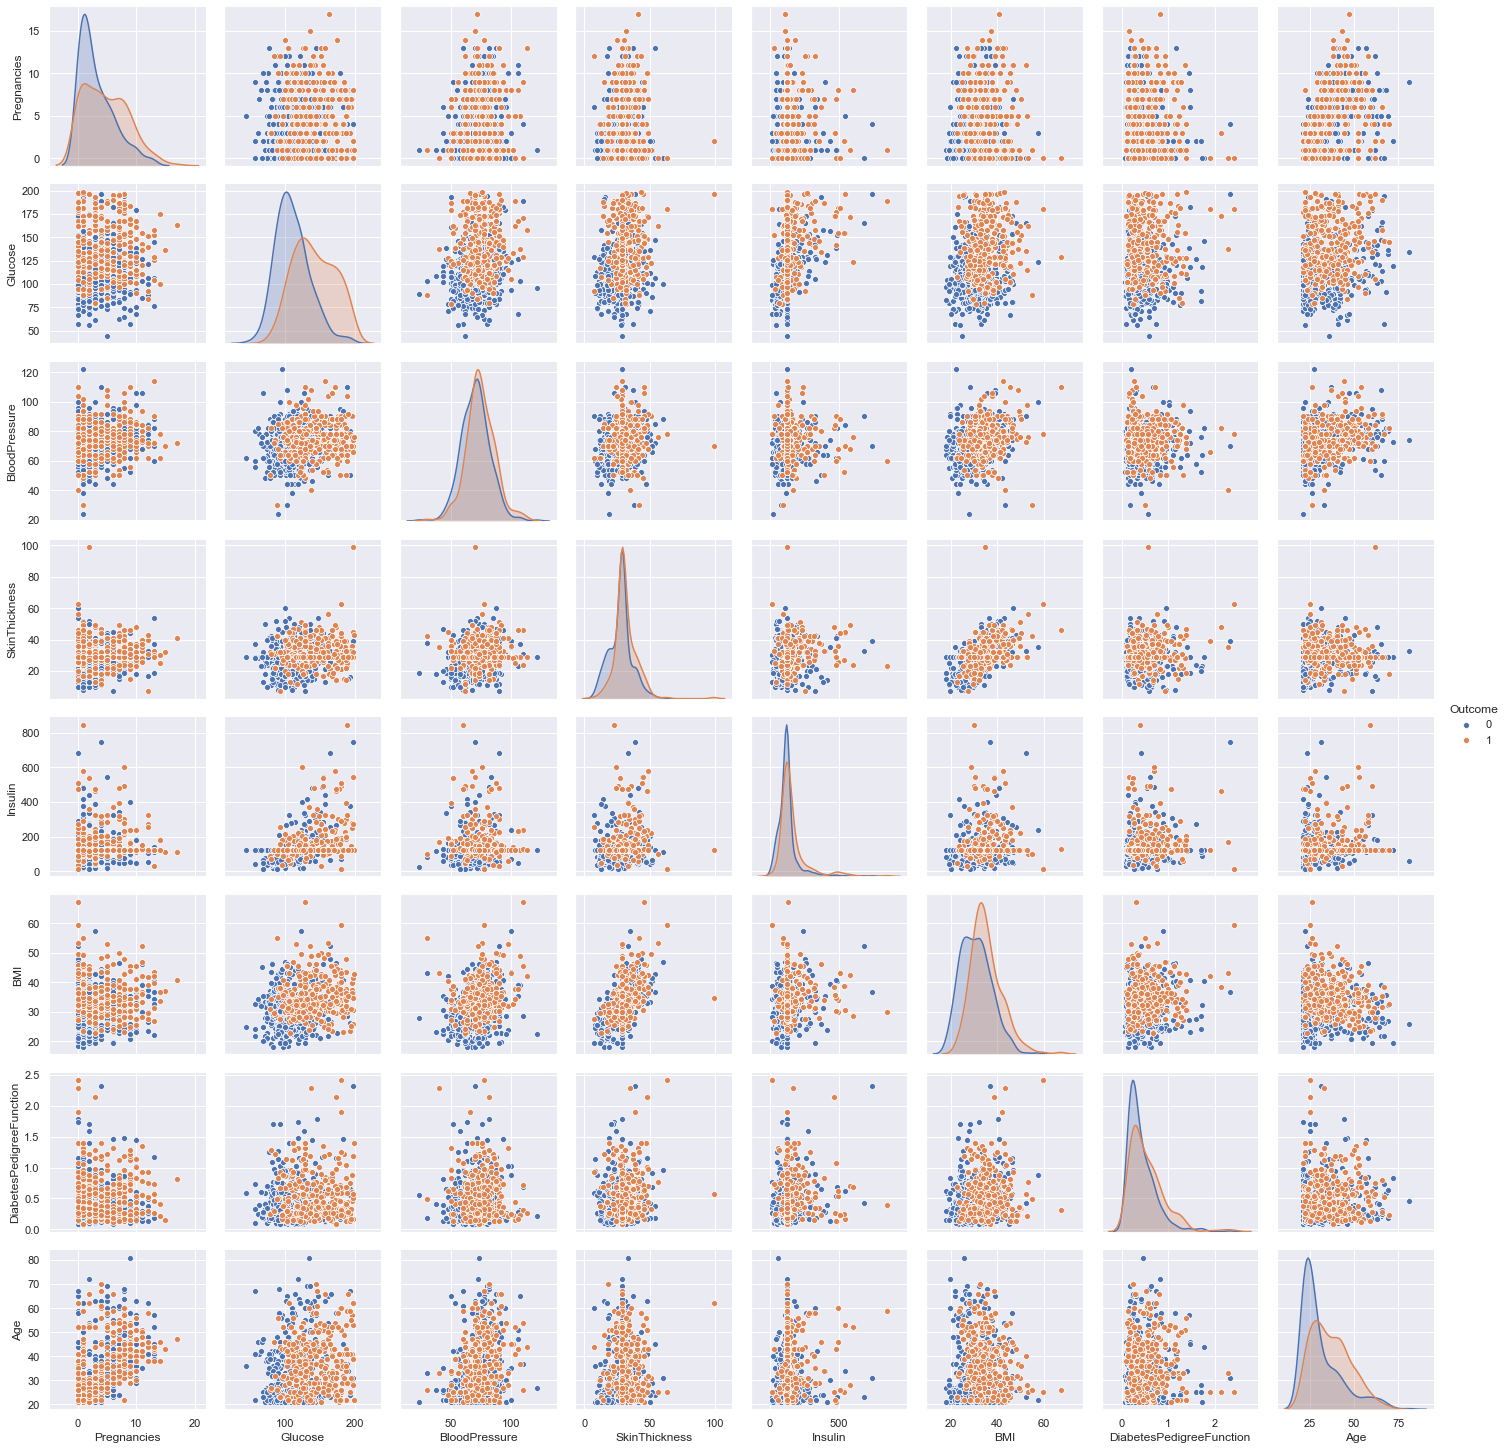

In [13]:
p=sns.pairplot(diabetes_data_copy,hue='Outcome')

'''
Pearson's Correlation Coefficient: helps you find out the relationship between two quantities. 
It gives you the measure of the strength of association between two variables. 
The value of Pearson's Correlation Coefficient can be between -1 to +1. 
1 means that they are highly correlated and 0 means no correlation.
'''

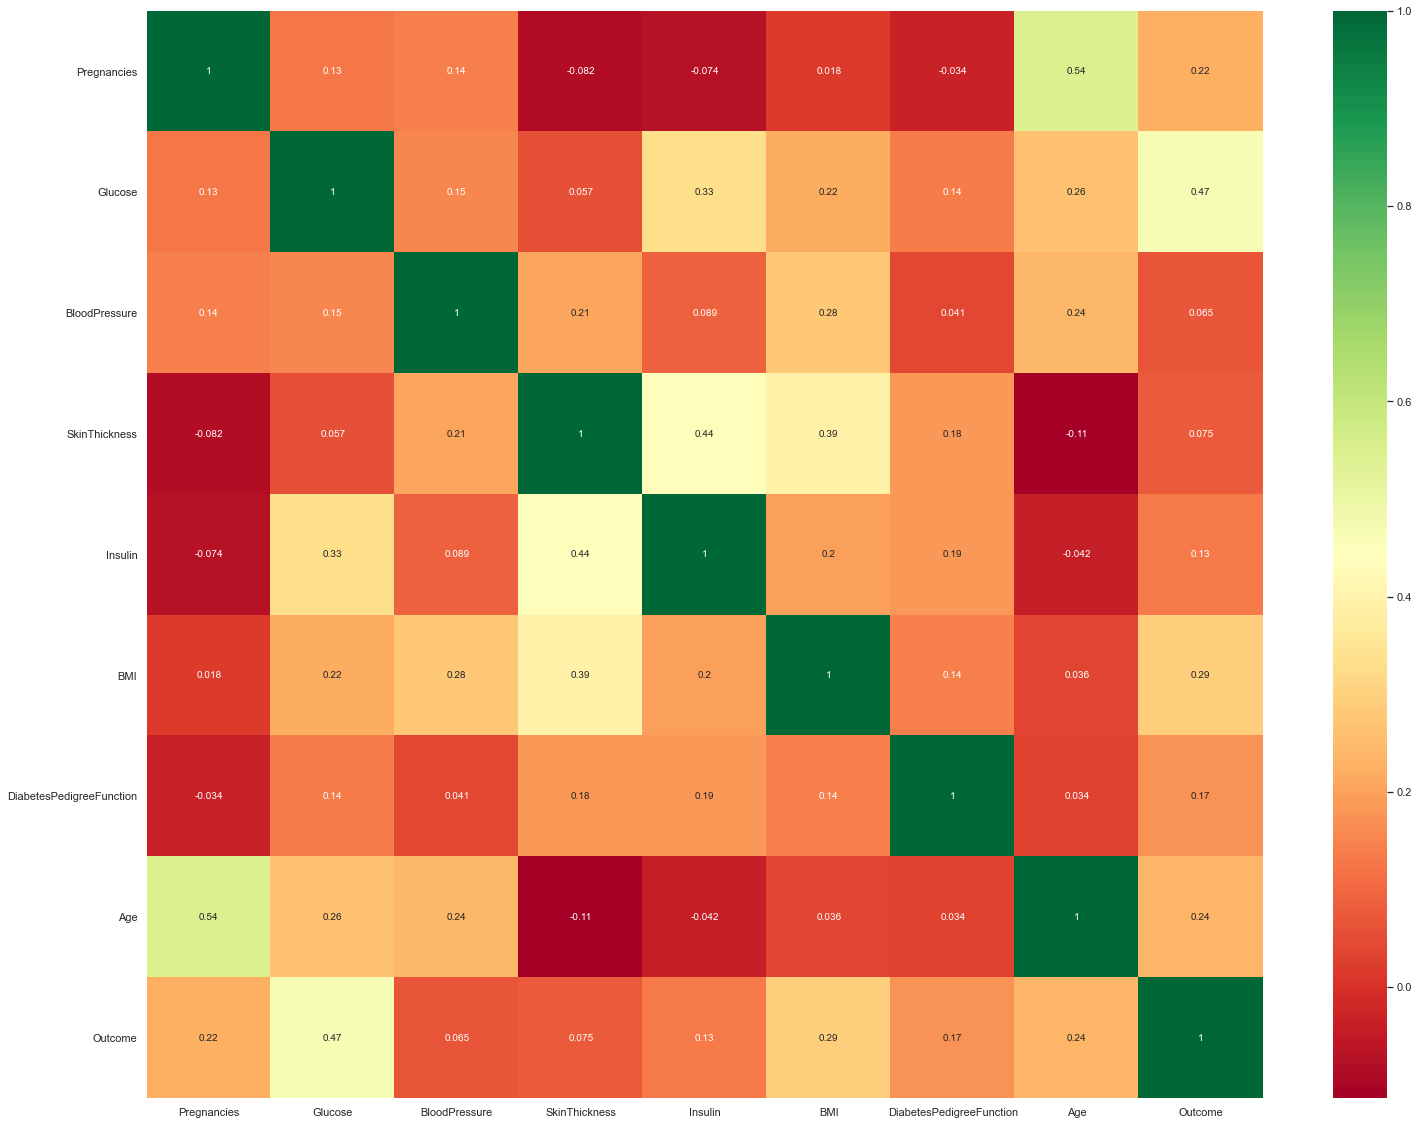

In [14]:
### Heatmap for unclean data
'''
A heat map is a two-dimensional representation of information with the help of colors. 
Heat maps can help the user visualize simple or complex information.
'''
plt.figure(figsize=(25,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data.corr(),annot=True,cmap='RdYlGn')

# Side note on scaling

In [15]:
from sklearn import preprocessing
import numpy as np
# Get dataset
df = pd.read_csv("california_housing_train.csv", sep=",")
# Normalize total_bedrooms column
x_array = np.array(df['total_bedrooms'])
normalized_X = preprocessing.normalize([x_array])

In [16]:
df['total_bedrooms'].describe().T

count    17000.000000
mean       539.410824
std        421.499452
min          1.000000
25%        297.000000
50%        434.000000
75%        648.250000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [17]:
print(normalized_X.min())
print(normalized_X.max())

1.120384967814871e-05
0.07220881117566844


In [18]:
from sklearn import preprocessing
# Get column names first
names = df.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B7BA03A4A8>,
      dtype=object)

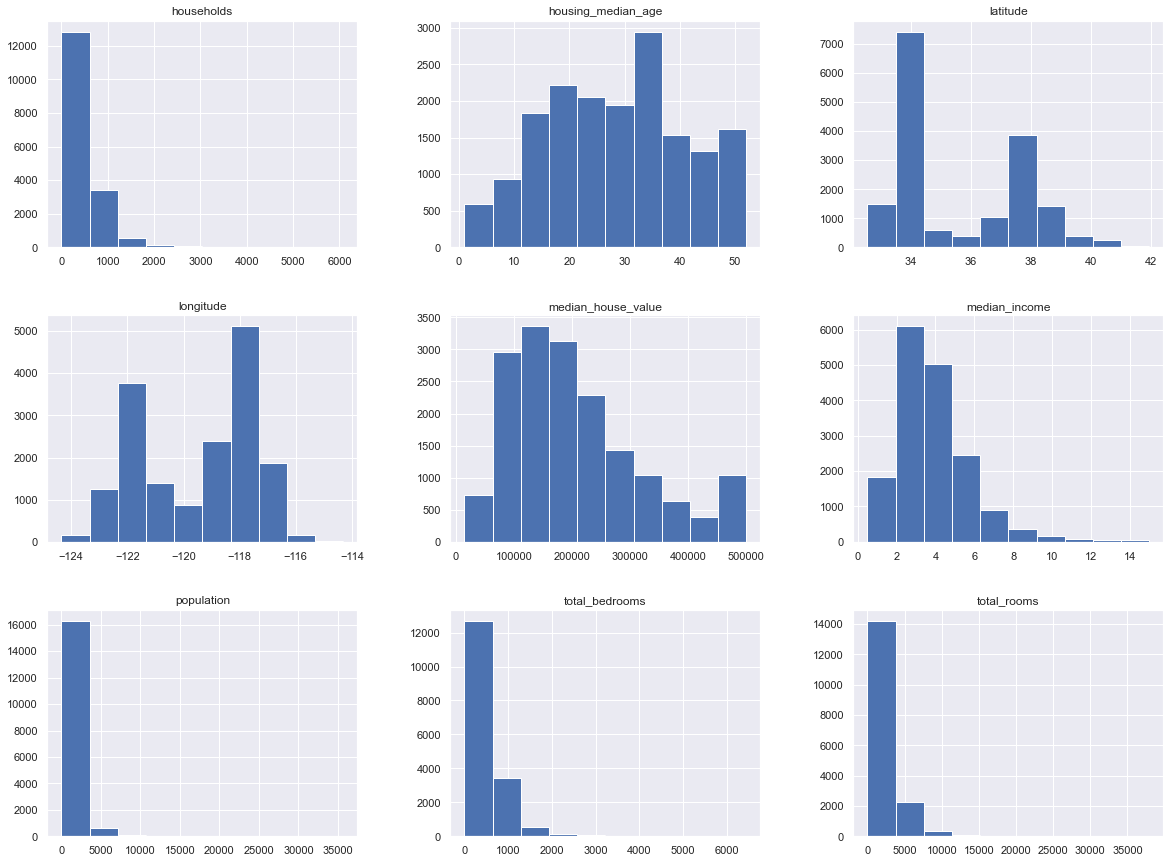

In [19]:
df.hist(figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B7BBBD1F98>,
      dtype=object)

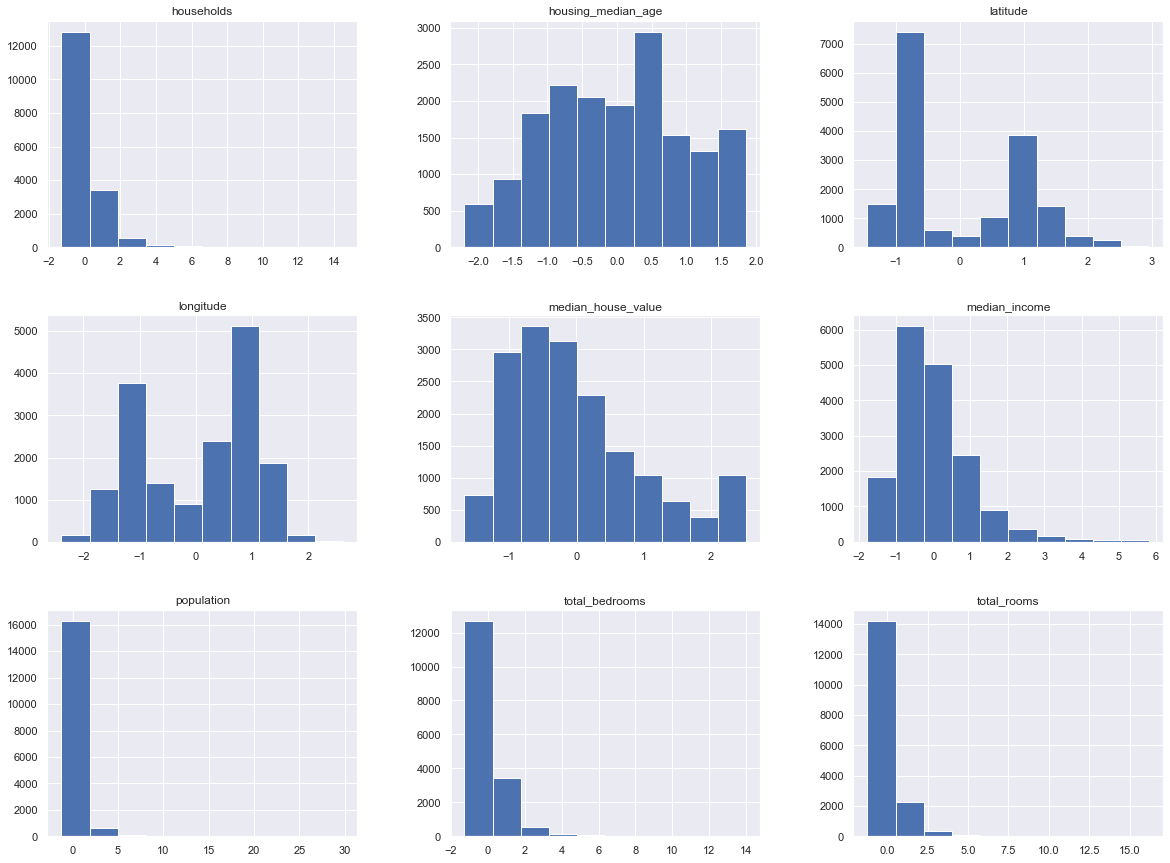

In [20]:
scaled_df.hist(figsize=(20,15))

## Back to project

In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1)),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [22]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [23]:
y=diabetes_data_copy.Outcome

# Side note on train/test split

In [24]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [25]:
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes=datasets.load_diabetes()
df=pd.DataFrame(diabetes.data, columns=columns)
y = diabetes.target


In [26]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [27]:
lm=linear_model.LinearRegression()
model= lm.fit(X_train,y_train)
predictions=lm.predict(X_test)

In [28]:
predictions[0:5]

array([150.65262327, 174.4771444 ,  51.25914043, 233.63949801,
        49.52502019])

Text(0, 0.5, 'Predictions')

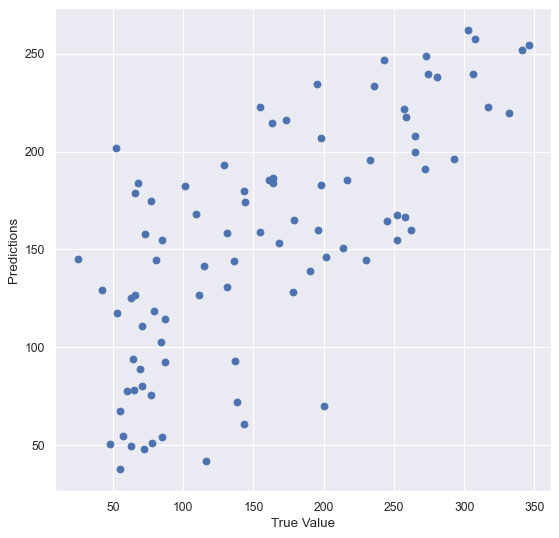

In [29]:
## plot the model
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(y_test,predictions)
plt.xlabel("True Value")
plt.ylabel("Predictions")

In [30]:
print("Train Score:{:.2f}".format(model.score(X_train,y_train)))
print("Test Score:{:.2f}".format(model.score(X_test,y_test)))

Train Score:0.51
Test Score:0.52


In [31]:
from sklearn.model_selection import KFold
X = np.array([[1,2],[3,4],[1,2],[3,4]])
y = np.array([1,2,3,4])
kf =KFold(n_splits=2) # Define the split - into 2 folds
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [32]:
# for train_index, test_index in df.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

# Leave One Out Cross Validation (LOOCV)

In [33]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X)

2

# cross validation

In [34]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [35]:
# Perfrom 6-fold cross validation
df=pd.DataFrame(diabetes.data, columns=columns)
y = diabetes.target
lm=linear_model.LinearRegression()
model= lm.fit(X_train,y_train)
scores=cross_val_score(model, df, y, cv=6)
print("Cross-validated scores:",scores)

Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


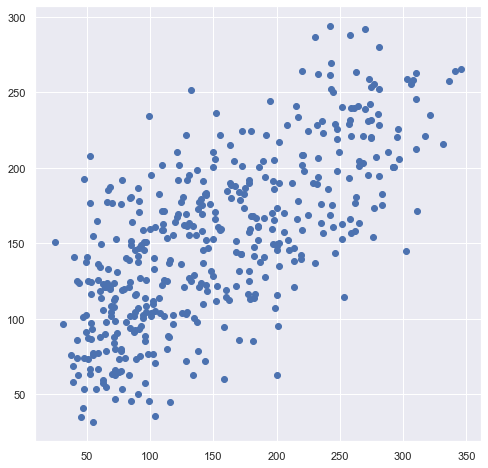

In [36]:
# Make cross validated predictions
plt.figure(figsize=(8,8))
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y,predictions)

In [37]:
accuracy = metrics.r2_score(y,predictions)
print("Cross-Predicted Accuracy:",accuracy)

Cross-Predicted Accuracy: 0.4908065838640776


# Back to project

# Test Train Split and Cross Validation methods

About Stratify : Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [38]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1)),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
y=diabetes_data_copy.Outcome

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1/3, random_state = 42, stratify = y)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test,y_test))

In [41]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i,v in enumerate(train_scores) if v == max_train_score]
print('Max train socre {} % and k = {}'.format(max_train_score*100, list(map(lambda x: x+1, train_scores_ind))))

Max train socre 100.0 % and k = [1]


In [42]:
train_scores

[1.0,
 0.84375,
 0.8671875,
 0.8359375,
 0.828125,
 0.8046875,
 0.814453125,
 0.802734375,
 0.798828125,
 0.802734375,
 0.798828125,
 0.79296875,
 0.794921875,
 0.796875]

In [43]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.5625 % and k = [11]


# Result Visualization

In [44]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in c:\users\sylar\anaconda3\lib\site-packages (0.10.1)


In [45]:
import seaborn as sns
print(sns.__version__)

0.10.1


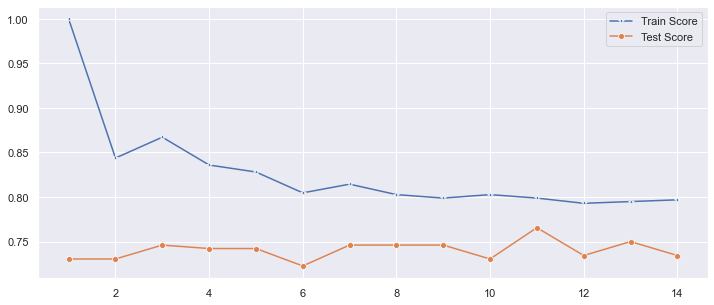

In [46]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [47]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)
knn.fit(X_train,y_train)
knn.score(X_test, y_test)

0.765625

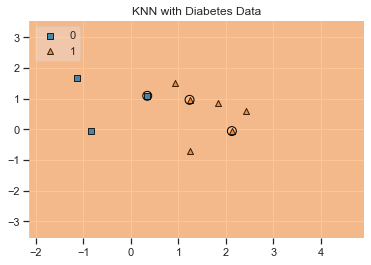

In [48]:
## trying to plot decision boundary 
from mlxtend.plotting import plot_decision_regions
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)
# Adding axes annotations
plt.title('KNN with Diabetes Data')
plt.show()

# Model Performance Analysis

In [49]:
# import confusion matrix
from sklearn.metrics import confusion_matrix
# let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,142,25,167
1,35,54,89
All,177,79,256


In [50]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
(tn, fp, fn, tp)

(142, 25, 35, 54)

Text(0.5, 12.5, 'Predicted label')

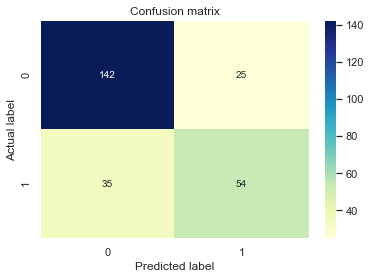

In [51]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
p= sns.heatmap(pd.DataFrame(cnf_matrix),annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Classification Report
## Report which includes Precision, Recall and F1-Score

In [52]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))

Accuracy: 0.765625
Precision: 0.6835443037974683
Recall: 0.6067415730337079
F1: 0.6428571428571429


In [54]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [55]:
(fpr, tpr, thresholds)

(array([0.        , 0.01197605, 0.0239521 , 0.06586826, 0.11976048,
        0.1497006 , 0.20359281, 0.28143713, 0.37724551, 0.52694611,
        0.67664671, 1.        ]),
 array([0.        , 0.04494382, 0.14606742, 0.25842697, 0.39325843,
        0.60674157, 0.71910112, 0.76404494, 0.91011236, 0.93258427,
        0.98876404, 1.        ]),
 array([1.90909091, 0.90909091, 0.81818182, 0.72727273, 0.63636364,
        0.54545455, 0.45454545, 0.36363636, 0.27272727, 0.18181818,
        0.09090909, 0.        ]))

In [56]:
knn.predict_proba(X_test)

array([[1.        , 0.        ],
       [0.27272727, 0.72727273],
       [0.63636364, 0.36363636],
       [0.90909091, 0.09090909],
       [0.54545455, 0.45454545],
       [0.72727273, 0.27272727],
       [0.27272727, 0.72727273],
       [0.09090909, 0.90909091],
       [1.        , 0.        ],
       [0.81818182, 0.18181818],
       [0.45454545, 0.54545455],
       [0.54545455, 0.45454545],
       [0.54545455, 0.45454545],
       [0.09090909, 0.90909091],
       [0.36363636, 0.63636364],
       [0.27272727, 0.72727273],
       [0.45454545, 0.54545455],
       [1.        , 0.        ],
       [0.72727273, 0.27272727],
       [0.27272727, 0.72727273],
       [0.90909091, 0.09090909],
       [0.90909091, 0.09090909],
       [0.81818182, 0.18181818],
       [0.63636364, 0.36363636],
       [0.90909091, 0.09090909],
       [0.72727273, 0.27272727],
       [0.36363636, 0.63636364],
       [0.72727273, 0.27272727],
       [1.        , 0.        ],
       [0.90909091, 0.09090909],
       [0.

In [57]:
roc_curve(y_test, y_pred_proba)

(array([0.        , 0.01197605, 0.0239521 , 0.06586826, 0.11976048,
        0.1497006 , 0.20359281, 0.28143713, 0.37724551, 0.52694611,
        0.67664671, 1.        ]),
 array([0.        , 0.04494382, 0.14606742, 0.25842697, 0.39325843,
        0.60674157, 0.71910112, 0.76404494, 0.91011236, 0.93258427,
        0.98876404, 1.        ]),
 array([1.90909091, 0.90909091, 0.81818182, 0.72727273, 0.63636364,
        0.54545455, 0.45454545, 0.36363636, 0.27272727, 0.18181818,
        0.09090909, 0.        ]))

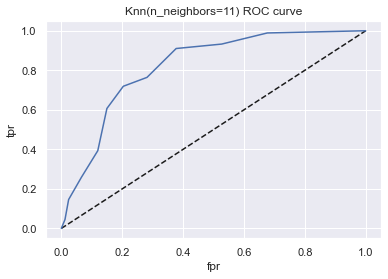

In [58]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [59]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8193500639171096

# Hyper Parameter optimization

In [61]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV
# In case of classifier like knn the prameter to be tuned is n_neighbors
param_grid = {'n_neighbors': np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters:" + str(knn_cv.best_params_))

Best Score:0.7721840251252015
Best Parameters:{'n_neighbors': 25}
